In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
# Build the model

i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              #metrics=['sparse_categorical_crossentropy','accuracy']) note: sparse data is already in loss data

In [9]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9854 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9864 - val_loss: 0.0698 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0702 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.0783 - val_accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9883 - val_loss: 0.0747 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9886 - val_loss: 0.0774 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0314 - accuracy: 0.9894 - val_loss: 0.0818 - val_accuracy:

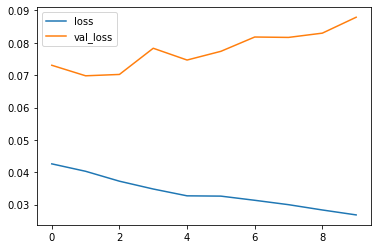

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

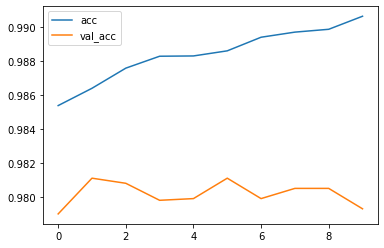

In [11]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
# Evaluate the model
print(model.evaluate(x_test, y_test, verbose='False'))

[0.0879092663526535, 0.9793000221252441]


In [13]:
# Predictions by the model
p_test =  np.argmax(model.predict(x_test), axis=-1) 
# model.predict(x_test) > 0.5).astype("int32")

In [19]:
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
print(confusion_matrix(y_test,p_test))

[[ 969    1    3    0    0    1    4    1    1    0]
 [   0 1127    3    1    0    0    1    0    3    0]
 [   3    0 1010    5    2    0    1    5    6    0]
 [   0    0    2  996    0    3    0    5    3    1]
 [   0    0    1    0  967    0    7    3    1    3]
 [   2    1    0   12    1  866    6    2    1    1]
 [   4    2    0    1    3    3  944    0    1    0]
 [   1    3   10    2    1    0    0 1007    1    3]
 [   2    1    2   11    7    6    3    5  936    1]
 [   2    5    1    5    9    4    1    8    3  971]]


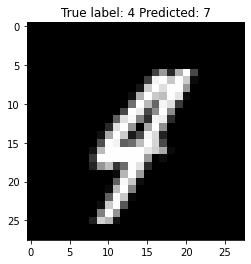

In [18]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));